In [1]:
%matplotlib inline

In [2]:
from Hex_class import  HexState
from Hex_utils import visualize_board, intmove_to_tupl
from random import randint
from Numba_hex_class import create_empty_board, _simulate

_simulate(10)

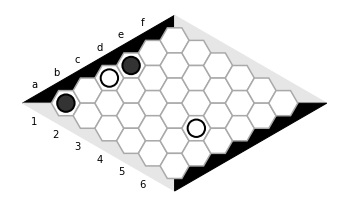

In [3]:
#CHECKING INLINE MATPLOTLIB GRAPH

board = create_empty_board(6)
board.step(0)
board.step(2)
board.step(3)
board.step(26)
visualize_board(board.get_board())


In [4]:
#TERMINAL STATE IS CORRECT FOR NUMBA

board_py = HexState(6)
board_numba= create_empty_board(6)

for _ in range(1000):
    board_py = HexState(6)
    board_numba= create_empty_board(6)
    while board_numba.winner() == 0:
        moves = board_numba.possible_moves()
        action_index = randint(0, moves.size-1)
        move = moves[action_index]
        board_py.step(intmove_to_tupl(move, 6))
        board_numba.step(move)
        
        if board_py.winner == None:
            py_winner = 0
        else:
            py_winner = board_py.winner
        numba_winner = board_numba.winner()
        
        if py_winner != numba_winner:
            print('WRONG')
    

In [5]:
#NUMBA BOARDS ARE NOT CONNECTED
#CREATED DUMMY OPERATION TO CHECK IF ARRAYS OF GROUPS ARE CONNECTED.
#THEY ARE NOT. REMOVED THE DEBUG FUNCTIONS FROM NUMBA_CLASS
board = create_empty_board(6)
board_copy = board.copy()
board.step(3)
print(board.get_board())
print(board_copy.get_board())

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


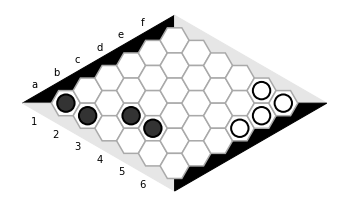

1
{1000: 0, 0: 0, 6: 0, 13: 19, 19: 19}
{1000: 0, 0: 1, 6: 0, 13: 0, 19: 1}
{0: [   0 1000    6], 19: [19 13]}
2
{1000: 0, 0: 0, 6: 0, 13: 19, 19: 19}
{1000: 0, 0: 1, 6: 0, 13: 0, 19: 1}
{0: [   0 1000    6], 19: [19 13]}
3
{1000: 0, 0: 0, 6: 0, 13: 19, 19: 0, 7: 0}
{1000: 0, 0: 2, 6: 0, 13: 0, 19: 1, 7: 0}
{0: [   0 1000    6    7   19   13]}


In [14]:
# # CHECKING IF ARRAYS OF DICTIONARY ARE CONNECTED WHILE COPYING

# board = create_empty_board(6)
# board.step(0)
# board.step(35)
# board.step(6)
# board.step(34)
# board.step(13)
# board.step(33)
# board.step(19)
# board.step(29)
# visualize_board(board.get_board())
# board_copy = board.copy()
# print(1)
# board.printer()
# print(2)
# board_copy.step(7)
# board.printer()
# print(3)
# board_copy.printer()

##Tested copy and terminal state

seems like they are correct